# **Project Title :** Urdu News Automated Classification

# **Name:** Hassan Ahmed
# **ID:** FA24-MSCS-0005



# **Goal of the Project**
This project aims to conduct an in-depth analysis of a dataset containing 1 million Urdu news articles to uncover the relationship between news trends, article length, and categories such as Sports, Entertainment, Science & Technology, and Business & Economics. The analysis will focus on identifying patterns, such as whether certain categories tend to have longer or shorter articles, how trends evolve over time, and whether article length influences category distributions. By exploring these trends, the project will provide insights into the structure and behavior of news articles across different categories. Following this analysis, a machine learning model will be developed to automatically categorize new news articles based on the insights gained from the data. The model will aim to accurately predict the category of incoming articles, streamlining content management and leveraging the identified relationships between article length and category to improve prediction accuracy. This combined approach will enhance understanding of news dynamics while automating the categorization process for new articles.


# **Business Questions**


1.   What is the distribution of news articles across different categories in the dataset?
2.   Which news sources contribute the most articles in the dataset?
3.   What is the trend of news publication over time?
4.   What is the average length of news articles for each category?
5.  How has the publication of news articles in each category changed over time?
6.  What is the correlation between specific headline types (common words in headlines) and the length of news articles?
7. Which words in headlines are most strongly associated with longer or shorter news articles?
8.  How is the distribution of news categories across weekdays and weekends?
9.  What are the seasonal trends in the distribution of news categories throughout the year?



# **Libraries**

1. **chardet**: A library for detecting the encoding of a text file or byte stream.
2. **numpy**: A library for numerical operations, providing support for arrays and matrices.
3. **pandas**: A powerful data manipulation and analysis library, ideal for handling structured data in tables.
4. **collections**: A module that implements specialized container datatypes, such as `Counter`, `deque`, and `OrderedDict`.
5. **nltk**: The Natural Language Toolkit, a library for working with human language data (text).
6. **word_tokenize**: A function from NLTK that splits text into individual words (tokens).
7. **string**: A module that provides a set of string constants and functions for string manipulation.
8. **seaborn**: A statistical data visualization library based on matplotlib, providing high-level interface for drawing attractive plots.
9. **matplotlib.pyplot**: A plotting library used to create static, animated, and interactive visualizations in Python.
10. **re**: A module for working with regular expressions, enabling pattern matching and text manipulation.
11. **LabelEncoder**: A preprocessing tool from scikit-learn that encodes categorical labels into numerical values.
12. **train_test_split**: A function from scikit-learn used to split data into training and testing sets for machine learning models.
13. **TfidfVectorizer**: A feature extraction tool from scikit-learn that converts text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).
14. **MultinomialNB**: A Naive Bayes classifier in scikit-learn, particularly suited for multi-class classification problems with discrete features.
15. **classification_report**: A scikit-learn function that generates a detailed report on the performance of classification models.
16. **confusion_matrix**: A function from scikit-learn that computes a confusion matrix to evaluate the accuracy of classification models.




In [1]:
import chardet
import numpy as np
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# **Step 01: Detect the file's encoding**

In [2]:
file_path = '/content/urdu-news-dataset-1M.csv'

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())

file_encoding = result['encoding']

print(f"Detected file encoding: {file_encoding}")

Detected file encoding: UTF-8-SIG


# **Step 02: Opening the file and loading the dataset**


In [3]:
with open(file_path, 'r', encoding=file_encoding, errors='replace') as file:
    data = pd.read_csv(file)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111861 entries, 0 to 111860
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        111861 non-null  int64  
 1   Headline     111861 non-null  object 
 2   News Text    111861 non-null  object 
 3   Category     111860 non-null  object 
 4   Date         111860 non-null  object 
 5   URL          111860 non-null  object 
 6   Source       111860 non-null  object 
 7   News length  111860 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.8+ MB


# **Step 03: Data Analysis**

In [4]:
data.head()

,Index,Headline,News Text,Category,Date,URL,Source,News length
0,0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,2020-12-06,https://www.dawnnews.tv/news/1148499/,Dawn News,1854.0
1,1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,2020-12-06,https://www.dawnnews.tv/news/1148498/,Dawn News,2016.0
2,2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148433/,Dawn News,2195.0
3,3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148430/,Dawn News,2349.0
4,4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148421/,Dawn News,2655.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111861 entries, 0 to 111860
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        111861 non-null  int64  
 1   Headline     111861 non-null  object 
 2   News Text    111861 non-null  object 
 3   Category     111860 non-null  object 
 4   Date         111860 non-null  object 
 5   URL          111860 non-null  object 
 6   Source       111860 non-null  object 
 7   News length  111860 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.8+ MB


In [6]:
data.isnull().sum()

,0
Index,0
Headline,0
News Text,0
Category,1
Date,1
URL,1
Source,1
News length,1


# **Step 04: Let's check unique categories in our dataset**


In [7]:
print("Unique categories:", data['Category'].unique())
print("\nNumber of articles per category:\n", data['Category'].value_counts())

Unique categories: ['Business & Economics' 'Entertainment' 'Science & Technology' 'Sports'
 nan]

Number of articles per category:
 Category
Sports                  44829
Entertainment           34901
Business & Economics    24131
Science & Technology     7999
Name: count, dtype: int64


# **Step 05: Exploratory Data Analysis**

## **Category Distribution (Pie Chart)**




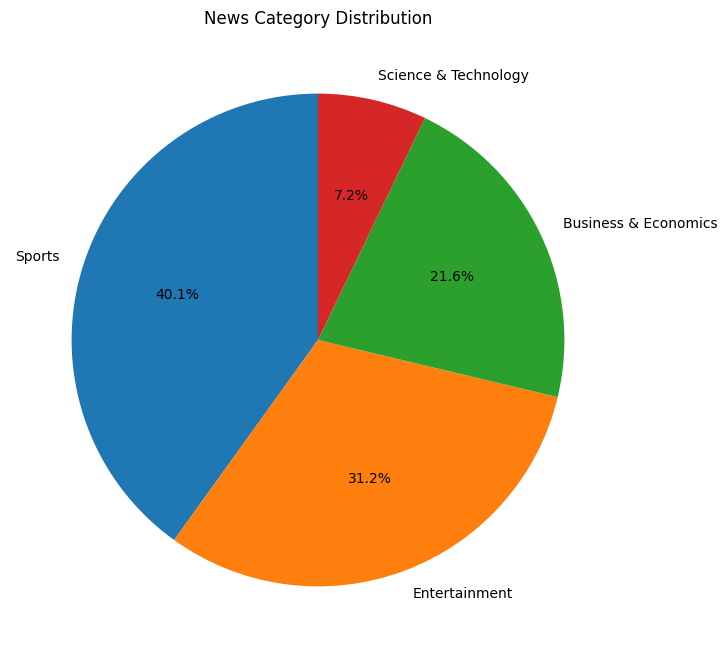

In [8]:
plt.figure(figsize=(8, 8))
category_counts = data['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('News Category Distribution')
plt.show()


## **Category Distribution (Bar Chart)**




Category Distribution:
Category
Sports                  44829
Entertainment           34901
Business & Economics    24131
Science & Technology     7999
Name: count, dtype: int64


<ipython-input-9-d08694cd90d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')


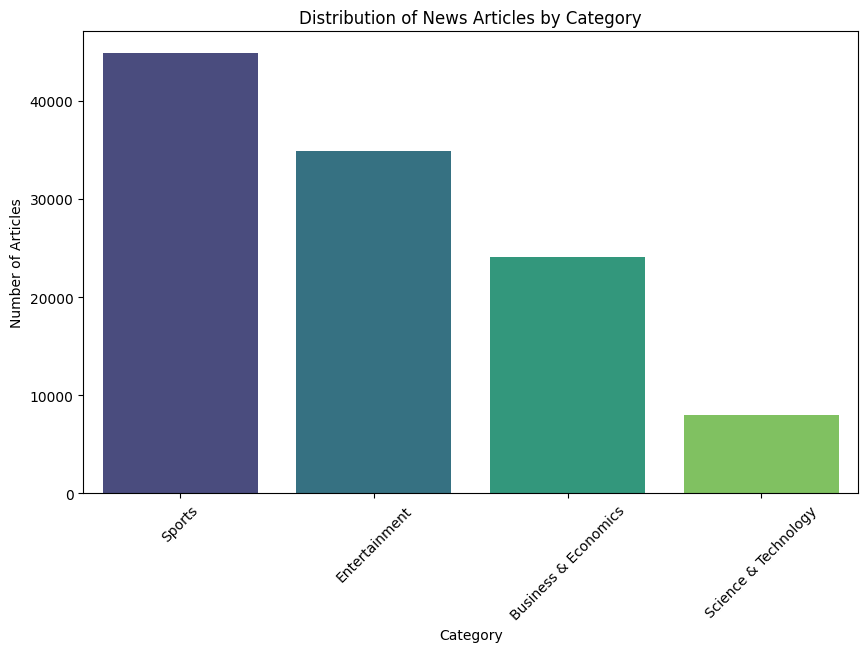

In [9]:
data.rename(columns={data.columns[0]: 'Index'}, inplace=True)


category_distribution = data['Category'].value_counts()
print("Category Distribution:")
print(category_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.title('Distribution of News Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## **News Length Distribution by Category (Box Plot)**

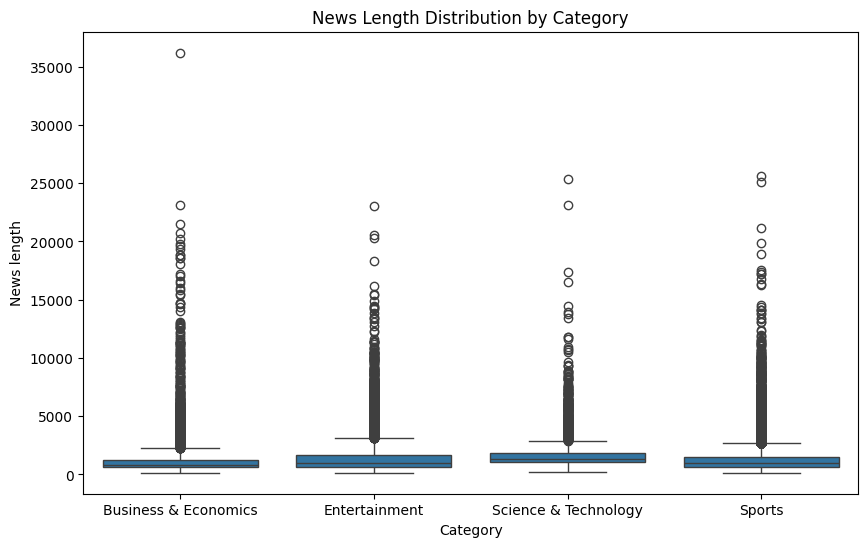

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='News length', data=data)  # Using 'Category' and 'News length' as the column names
plt.title('News Length Distribution by Category')
plt.show()

## **Plotting the top words for each category**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-12-023e8a0fc8cf>:24: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  plt.tight_layout()
<ipython-input-12-023e8a0fc8cf>:24: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
<ipython-input-12-023e8a0fc8cf>:24: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC 

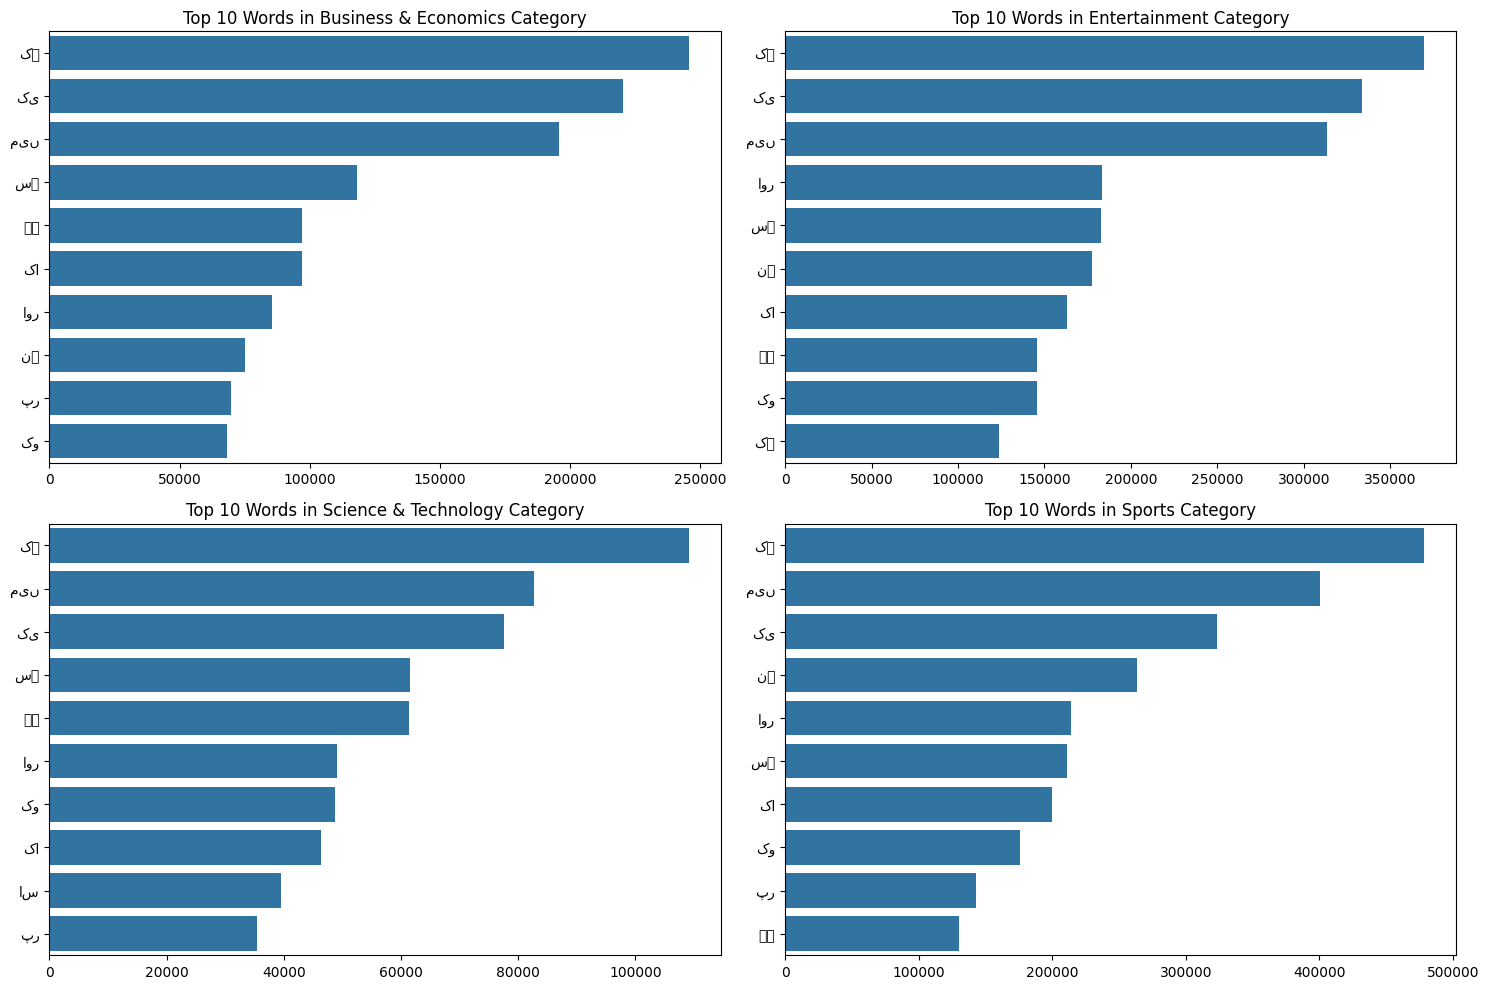

In [12]:
import nltk
nltk.download('punkt_tab')
category_words = {}
for category, group in data.groupby('Category'):
    # Concatenate all text within the category
    text = ' '.join(group['News Text'].dropna().astype(str))
    # Tokenize and remove punctuation
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    # Count word frequencies
    word_freq = Counter(words)
    category_words[category] = word_freq


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for idx, (category, word_freq) in enumerate(category_words.items()):
    ax = axes[idx // 2, idx % 2]
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    top_words = sorted_words[:10]
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), ax=ax)
    ax.set_title(f'Top 10 Words in {category} Category')

plt.tight_layout()
plt.show()

# **Step 06: Basic text preprocessing**

In [13]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', str(text))
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

### **Apply preprocessing to News Text**


In [15]:
data['cleaned_text'] = data['News Text'].apply(preprocess_text)

# **Step 07: Encode the categories**

In [16]:
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['Category'])

# **Step 08: Split the data into features and target**


In [17]:
X = data['cleaned_text']
y = data['category_encoded']

### **keep stratification but remove rare categories**

In [18]:
category_counts = data['Category'].value_counts()
valid_categories = category_counts[category_counts >= 2].index
mask = data['Category'].isin(valid_categories)

# **Step 09: Again split the data into features and target**

In [19]:
X = data[mask]['cleaned_text']
y = data[mask]['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 89488
Test set size: 22372


# **Step 10: Create TF-IDF features**


In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Step 11: Train a Naive Bayes classifier**

In [21]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

# **Step 12: Make predictions**

In [22]:
y_pred = model.predict(X_test_tfidf)

# **Step 13: Evaluate the model**

In [23]:

unique_classes = np.unique(np.concatenate([y_test, y_pred]))
class_names = label_encoder.inverse_transform(unique_classes)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                      precision    recall  f1-score   support

Business & Economics       0.95      0.97      0.96      4826
       Entertainment       0.94      0.94      0.94      6980
Science & Technology       0.83      0.90      0.87      1600
              Sports       0.99      0.97      0.98      8966

            accuracy                           0.96     22372
           macro avg       0.93      0.95      0.94     22372
        weighted avg       0.96      0.96      0.96     22372



### **Additional information about the classes**

In [24]:
print("\nNumber of classes in test set:", len(np.unique(y_test)))
print("Number of classes in predictions:", len(np.unique(y_pred)))
print("\nClass distribution in test set:")
for class_id in np.unique(y_test):
    class_name = label_encoder.inverse_transform([class_id])[0]
    count = sum(y_test == class_id)
    print(f"{class_name}: {count}")


Number of classes in test set: 4
Number of classes in predictions: 4

Class distribution in test set:
Business & Economics: 4826
Entertainment: 6980
Science & Technology: 1600
Sports: 8966


# **Step 14: Create confusion matrix**

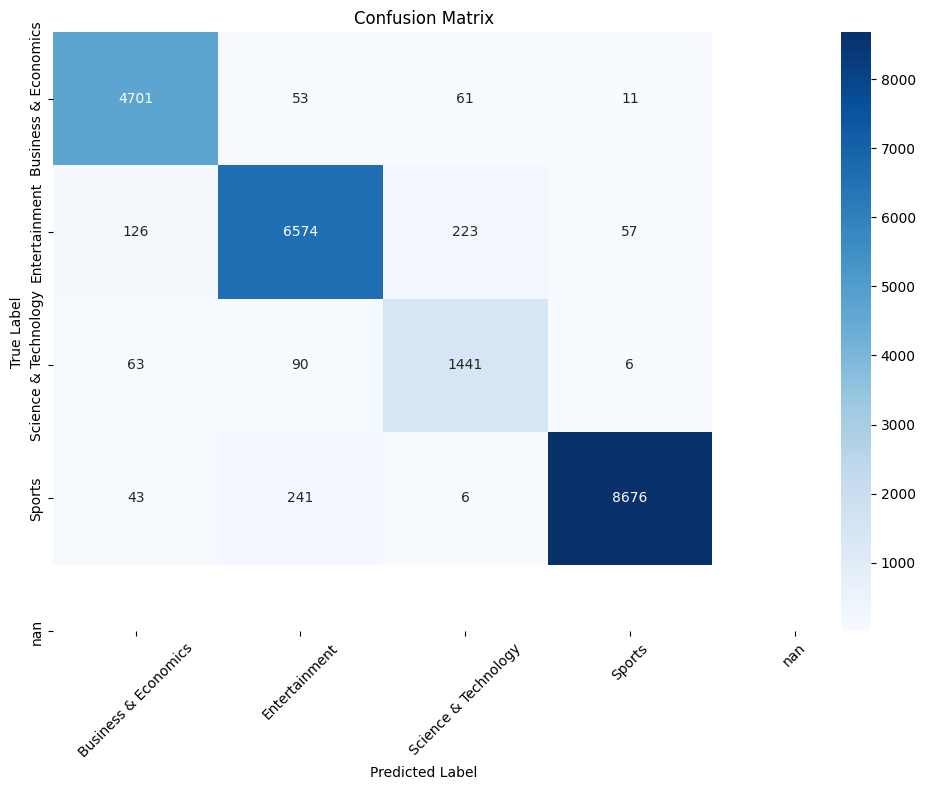

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Test Cases on unseen data**

In [26]:
def predict_new_text(text):
    # Preprocess the text
    cleaned = preprocess_text(text)
    # Transform using tf-idf
    text_tfidf = tfidf.transform([cleaned])
    # Predict
    prediction = model.predict(text_tfidf)
    # Get the predicted category name
    predicted_category = label_encoder.inverse_transform(prediction)[0]
    return predicted_category

In [27]:
# Example usage 01:
sample_text = "بابر اعظم کو اس کا حق دیجیے اور فیب فائیو میں اسے شامل کیجیے"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]

    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Sports

Prediction probabilities: {'Sports': 0.8228966537979098, 'Entertainment': 0.1140197798362497, 'Business & Economics': 0.03376850453967317, 'Science & Technology': 0.029315061826165657}


In [28]:
# Example usage 02:
sample_text = "سوشل میڈیا انفلوئنسرز کی جانب سے تجارتی ایپس کی تشہیر قانونی عمل ہے؟"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Science & Technology

Prediction probabilities: {'Science & Technology': 0.43790835338943473, 'Entertainment': 0.37553747414899136, 'Business & Economics': 0.17089890915941777, 'Sports': 0.01565526330215722}


In [29]:
# Example usage 03:
sample_text = "’جموں کی دھڑکن‘ سمجھی جانے والی انسٹاگرام سٹار سمرن سنگھ کمرے میں مردہ پائی گئیں"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Entertainment

Prediction probabilities: {'Entertainment': 0.8946868711146756, 'Sports': 0.08436536648776514, 'Science & Technology': 0.017954521953872687, 'Business & Economics': 0.00299324044368761}


In [30]:
# Example usage 04:
sample_text = "گرل فرینڈ سے بریک اپ، انڈیا میں نوجوان کی مچھر بھگانے والی دوا سے خودکشی کی کوشش"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Entertainment

Prediction probabilities: {'Entertainment': 0.940554494765136, 'Sports': 0.04062564310030906, 'Science & Technology': 0.017156125389037043, 'Business & Economics': 0.0016637367455185007}


In [31]:
# Example usage 05:
sample_text = "سعودی فارورڈ صالح الشہری انجری کے باعث گلف کپ سے باہر"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Sports

Prediction probabilities: {'Sports': 0.9434668115479063, 'Entertainment': 0.030856697711456067, 'Business & Economics': 0.018578589473195163, 'Science & Technology': 0.007097901267443955}


In [32]:
# Example usage 06:
sample_text = "ریاستی ملکیتی اداروں نے 6 ماہ میں 147 ارب روپے کا نقصان کیا، رپورٹ میں انکشاف"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Business & Economics

Prediction probabilities: {'Business & Economics': 0.8974748246038265, 'Entertainment': 0.04419611184019111, 'Science & Technology': 0.04004691114146338, 'Sports': 0.01828215241451746}


In [33]:
# Example usage 07:
sample_text = "دنیا کا سب سے بڑا انجن جو یومیہ 250 ٹن ایندھن استعمال کرتا ہے"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Business & Economics

Prediction probabilities: {'Business & Economics': 0.7123159477986609, 'Science & Technology': 0.2590737993185356, 'Entertainment': 0.025760590791863856, 'Sports': 0.002849662090937982}


In [34]:
# Example usage 08:
sample_text = "رواں مالی سال ترسیلات زر میں اضافہ ریکارڈ، 5 ماہ میں ترسیلات زر 14.77 ارب ڈالر رہیں: وزارت خزانہ"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Business & Economics

Prediction probabilities: {'Business & Economics': 0.9990258049549948, 'Entertainment': 0.0006352539125006156, 'Science & Technology': 0.0002253353867299533, 'Sports': 0.00011360574577291435}


In [35]:
# Example usage 09:
sample_text = "آسٹریلوی ٹینس سٹار میکس پرسل ڈوپنگ کے الزام میں معطل"  # Replace with actual Urdu news text
print("\nPredicted category:", predict_new_text(sample_text))


def predict_probabilities(text):
    cleaned = preprocess_text(text)
    text_tfidf = tfidf.transform([cleaned])
    probabilities = model.predict_proba(text_tfidf)[0]
    # Get categories and their probabilities
    categories = label_encoder.classes_
    prob_dict = dict(zip(categories, probabilities))
    # Sort by probability
    return dict(sorted(prob_dict.items(), key=lambda x: x[1], reverse=True))

# Example usage:
print("\nPrediction probabilities:", predict_probabilities(sample_text))


Predicted category: Sports

Prediction probabilities: {'Sports': 0.9388859375687331, 'Entertainment': 0.0491972968704925, 'Science & Technology': 0.008911687133955622, 'Business & Economics': 0.0030050784268197584}


Category Distribution:
Category
Sports                  44829
Entertainment           34901
Business & Economics    24131
Science & Technology     7999
Name: count, dtype: int64


<ipython-input-36-9c37bdec17d3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')


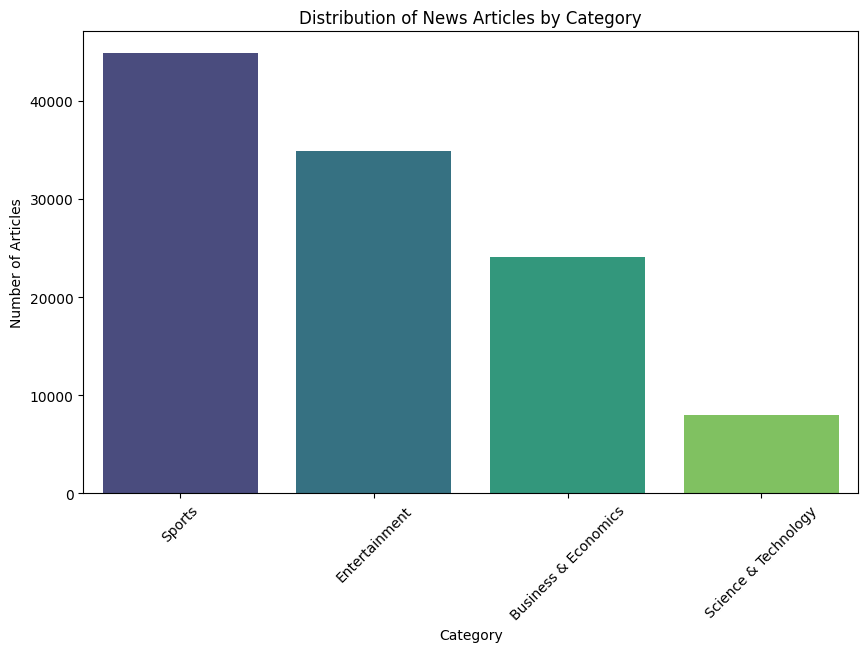

In [36]:

# Rename the ï»¿Index column to 'Index'
data.rename(columns={data.columns[0]: 'Index'}, inplace=True)

category_distribution = data['Category'].value_counts()
print("Category Distribution:")
print(category_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.title('Distribution of News Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()




News Source Distribution:
Source
Geo News        38881
Dawn News       38377
Ab Tak News     18231
92 News         13388
Express News     2983
Name: count, dtype: int64


<ipython-input-37-2ce577608135>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_distribution.index[:10], y=source_distribution.values[:10], palette='muted')


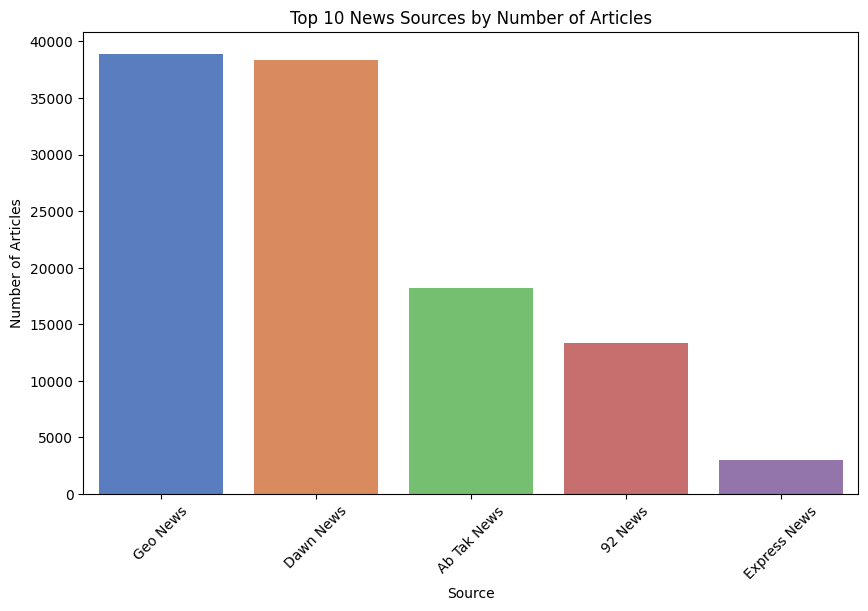

In [37]:

source_distribution = data['Source'].value_counts()
print("\nNews Source Distribution:")
print(source_distribution.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=source_distribution.index[:10], y=source_distribution.values[:10], palette='muted')
plt.title('Top 10 News Sources by Number of Articles')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()




Trend of News Publication Over Time:
Date
2020-08    546
2020-09    583
2020-10    612
2020-11    615
2020-12    155
Freq: M, dtype: int64


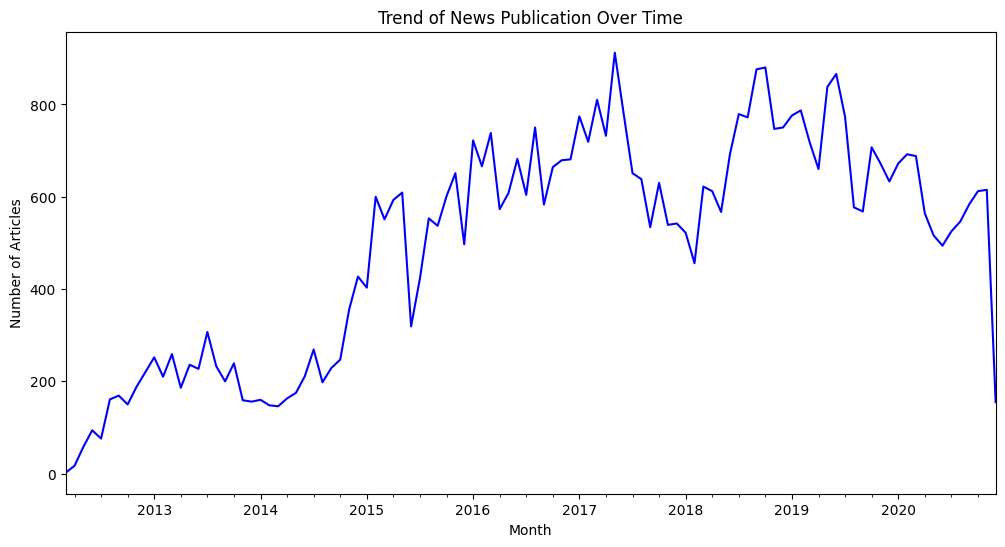

In [38]:

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
trend_over_time = data.groupby(data['Date'].dt.to_period('M')).size()
print("\nTrend of News Publication Over Time:")
print(trend_over_time.tail())


trend_over_time.plot(figsize=(12, 6), title='Trend of News Publication Over Time', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()




Average News Length by Category:
Category
Science & Technology    1615.274534
Entertainment           1325.771497
Sports                  1230.875125
Business & Economics    1132.370188
Name: News length, dtype: float64


<ipython-input-39-a91cda93a172>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_length.index, y=average_length.values, palette='coolwarm')


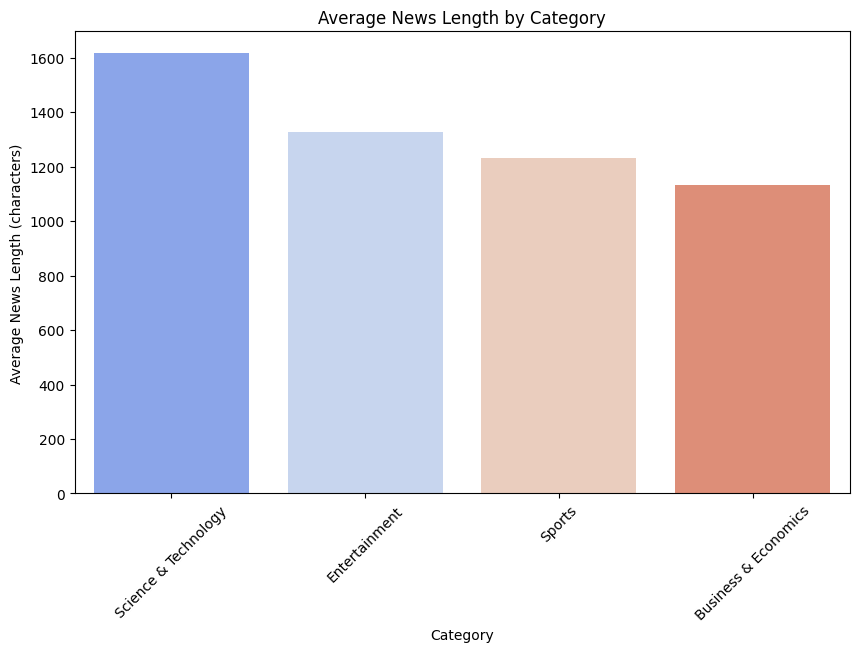

In [39]:

average_length = data.groupby('Category')['News length'].mean().sort_values(ascending=False)
print("\nAverage News Length by Category:")
print(average_length)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_length.index, y=average_length.values, palette='coolwarm')
plt.title('Average News Length by Category')
plt.xlabel('Category')
plt.ylabel('Average News Length (characters)')
plt.xticks(rotation=45)
plt.show()



<ipython-input-40-33b37f4d3beb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='News length', data=data, palette='Set3')


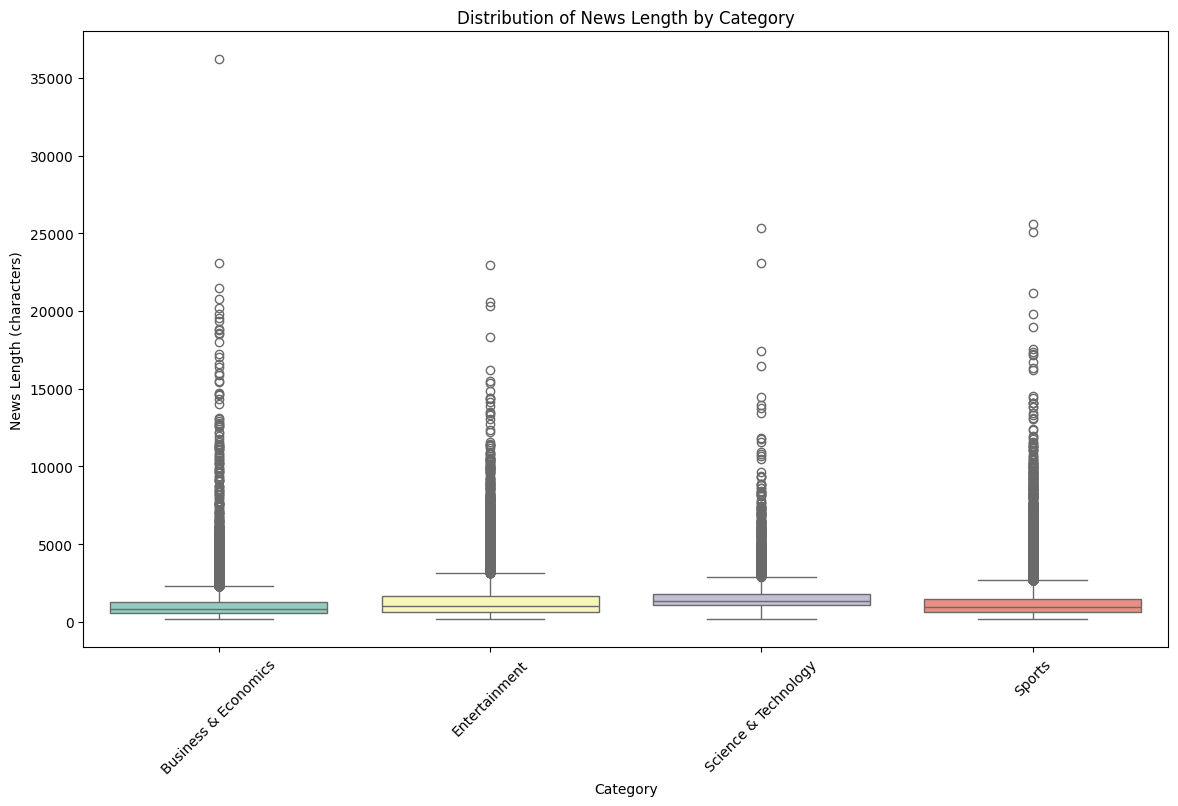

In [40]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='News length', data=data, palette='Set3')
plt.title('Distribution of News Length by Category')
plt.xlabel('Category')
plt.ylabel('News Length (characters)')
plt.xticks(rotation=45)
plt.show()




Category Clusters Based on News Length:
               Category  News length  Cluster
0  Business & Economics  1132.370188        2
1         Entertainment  1325.771497        0
2  Science & Technology  1615.274534        1
3                Sports  1230.875125        0


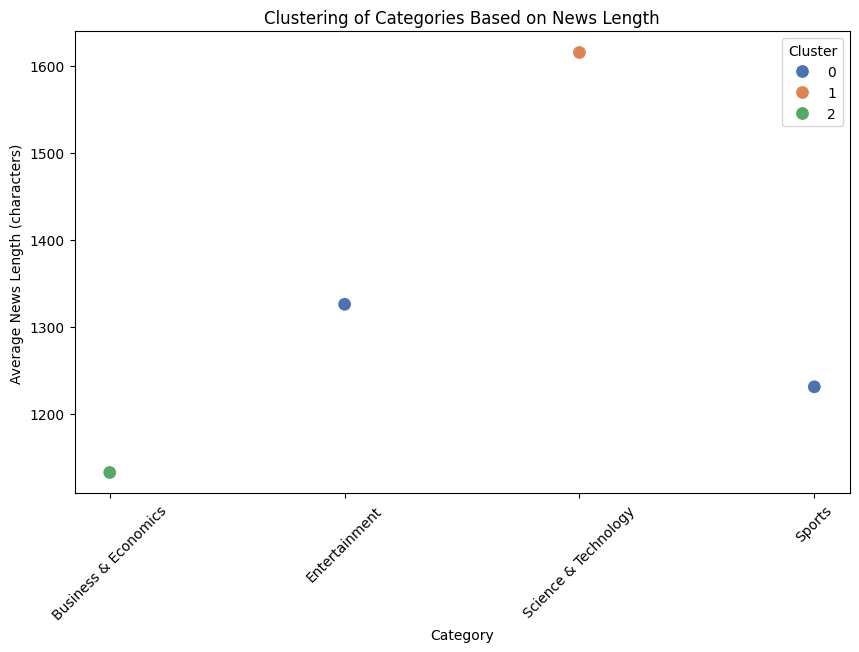

In [43]:

from sklearn.cluster import KMeans

category_length = data.groupby('Category')['News length'].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
category_length['Cluster'] = kmeans.fit_predict(category_length[['News length']])

print("\nCategory Clusters Based on News Length:")
print(category_length)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='News length', hue='Cluster', data=category_length, palette='deep', s=100)
plt.title('Clustering of Categories Based on News Length')
plt.xlabel('Category')
plt.ylabel('Average News Length (characters)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

In [44]:

missing_data = data.isnull().sum()
print("\nMissing Data Summary:")
print(missing_data)


Missing Data Summary:
Index                   0
Headline                0
News Text               0
Category                1
Date                59274
URL                     1
Source                  1
News length             1
cleaned_text            0
category_encoded        0
dtype: int64



Trends in Each Category Over Time:
Category  Business & Economics  Entertainment  Science & Technology  Sports
Date                                                                       
2020-08                  111.0          200.0                 109.0   126.0
2020-09                  128.0          230.0                 125.0   100.0
2020-10                  150.0          239.0                 119.0   104.0
2020-11                  139.0          235.0                  96.0   145.0
2020-12                   52.0           47.0                  25.0    31.0


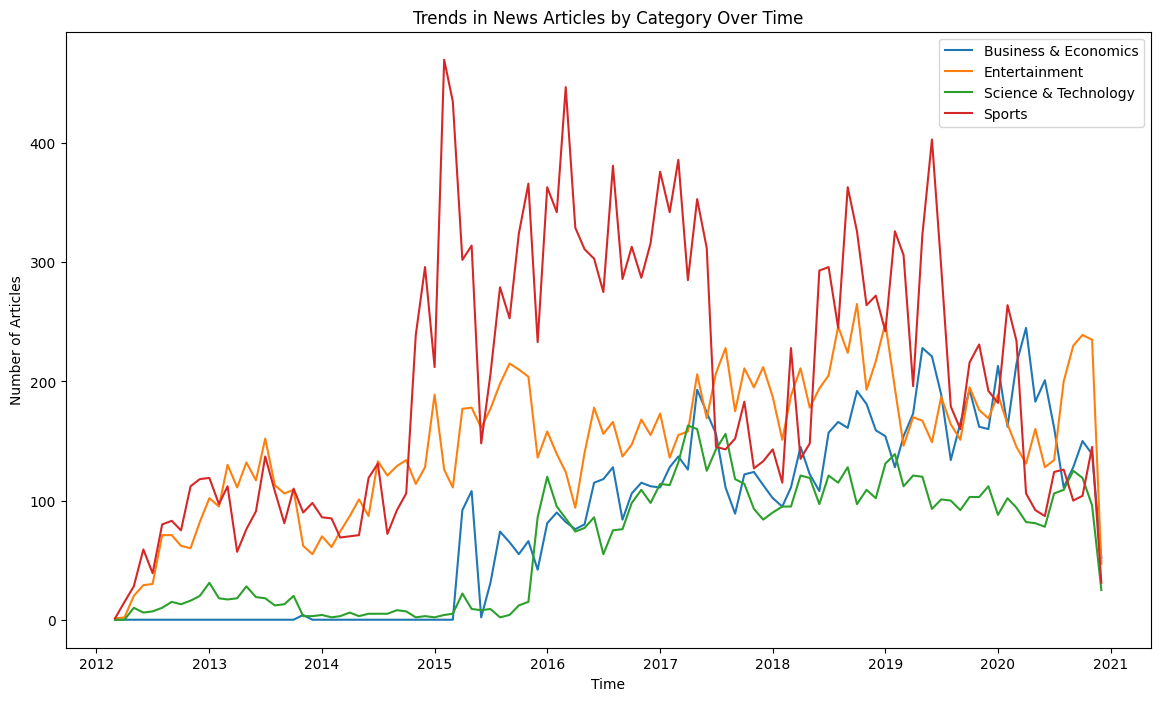

In [45]:

category_trends = data.groupby([data['Date'].dt.to_period('M'), 'Category']).size().unstack().fillna(0)
print("\nTrends in Each Category Over Time:")
print(category_trends.tail())

plt.figure(figsize=(14, 8))
for category in category_trends.columns:
    plt.plot(category_trends.index.to_timestamp(), category_trends[category], label=category)

plt.title('Trends in News Articles by Category Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()



In [48]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100, stop_words='english')
headline_features = vectorizer.fit_transform(data['Headline'].fillna('')).toarray()
feature_names = vectorizer.get_feature_names_out()

headline_length_df = pd.DataFrame(headline_features, columns=feature_names)
headline_length_df['News length'] = data['News length']

correlations = headline_length_df.corr()['News length'].sort_values(ascending=False)


Top Words Correlated with Longer News Articles:
Word: News length, Correlation: 1.0000
Word: کیا, Correlation: 0.0885
Word: نہیں, Correlation: 0.0587
Word: ہے, Correlation: 0.0546
Word: ہیں, Correlation: 0.0426
Word: پر, Correlation: 0.0363
Word: کرنے, Correlation: 0.0359
Word: لیے, Correlation: 0.0307
Word: سے, Correlation: 0.0300
Word: کے, Correlation: 0.0268

Top Words Correlated with Shorter News Articles:
Word: میں, Correlation: -0.0394
Word: مارکیٹ, Correlation: -0.0425
Word: قیمت, Correlation: -0.0432
Word: کر, Correlation: -0.0444
Word: فلم, Correlation: -0.0482
Word: اسٹاک, Correlation: -0.0506
Word: جیت, Correlation: -0.0538
Word: ہالی, Correlation: -0.0670
Word: ٹریلر, Correlation: -0.0676
Word: جاری, Correlation: -0.0824


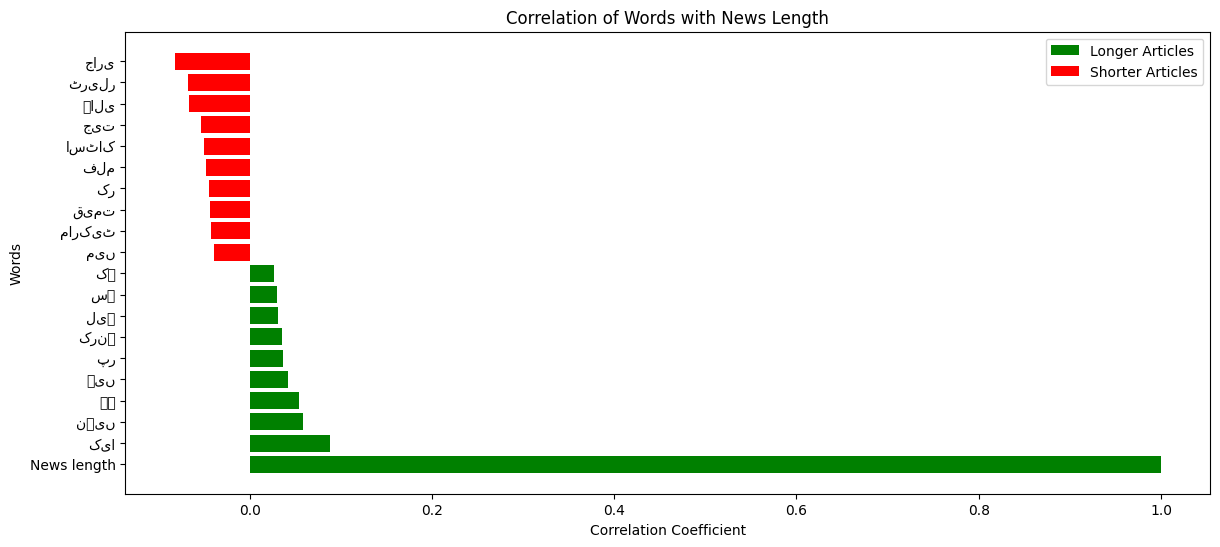

In [50]:

longer_words = correlations.head(10)
shorter_words = correlations.tail(10)

print("\nTop Words Correlated with Longer News Articles:")
for word, corr in longer_words.items():
    print(f"Word: {word}, Correlation: {corr:.4f}")

print("\nTop Words Correlated with Shorter News Articles:")
for word, corr in shorter_words.items():
    print(f"Word: {word}, Correlation: {corr:.4f}")


plt.figure(figsize=(14, 6))
plt.barh(longer_words.index, longer_words.values, color='green', label='Longer Articles')
plt.barh(shorter_words.index, shorter_words.values, color='red', label='Shorter Articles')
plt.title('Correlation of Words with News Length')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Words')
plt.legend()
plt.show()




News Category Distribution by Weekdays and Weekends:
Category   Business & Economics  Entertainment  Science & Technology  Sports
Weekday                                                                     
Monday                     1484           2445                  1050    3253
Tuesday                    1532           2570                  1083    3121
Wednesday                  1513           2361                  1208    3234
Thursday                   1482           2553                  1199    3229
Friday                     1356           2424                   900    3058
Saturday                   1035           2021                   738    2788
Sunday                      628           1224                   634    2464


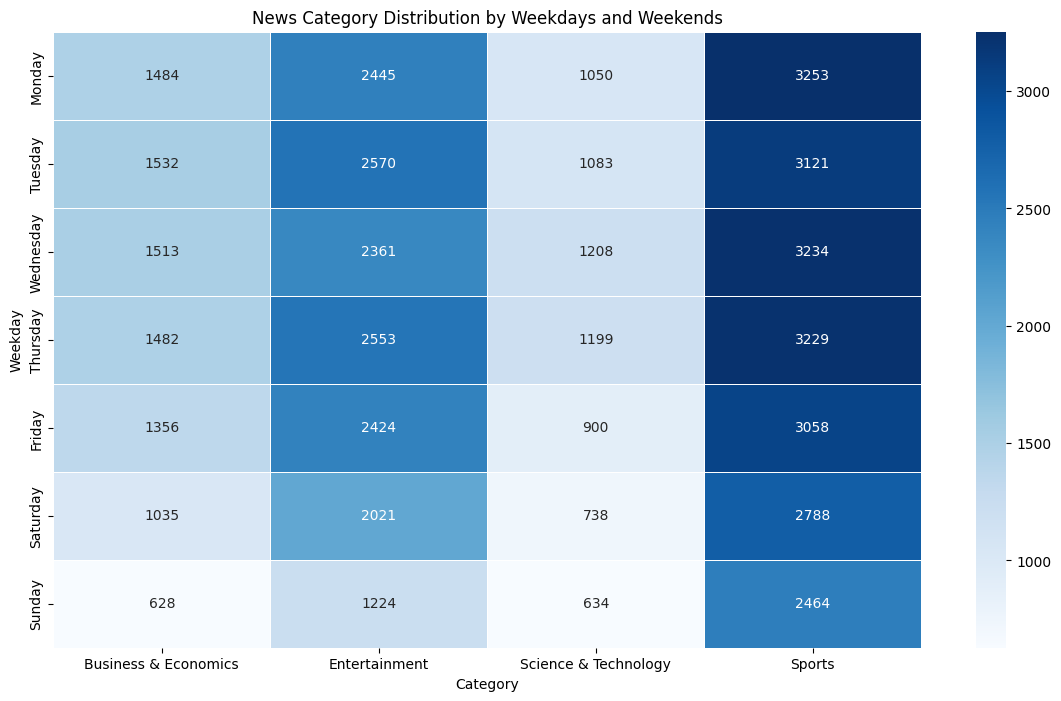

In [51]:

data['Weekday'] = data['Date'].dt.day_name()
weekday_distribution = data.groupby(['Weekday', 'Category']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print("\nNews Category Distribution by Weekdays and Weekends:")
print(weekday_distribution)


plt.figure(figsize=(14, 8))
sns.heatmap(weekday_distribution, annot=True, fmt='g', cmap='Blues', linewidths=0.5)
plt.title('News Category Distribution by Weekdays and Weekends')
plt.xlabel('Category')
plt.ylabel('Weekday')
plt.show()



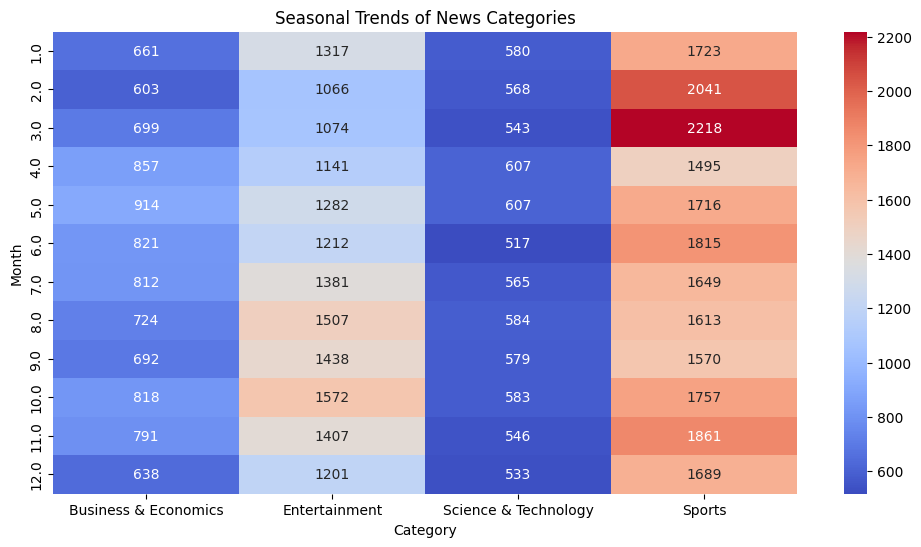

In [52]:
data['Date'] = pd.to_datetime(data['Date'])


data.columns = data.columns.str.strip()


data.set_index('Date', inplace=True)


seasonal_trends = data.groupby([data.index.month, 'Category']).size().unstack().fillna(0)


plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_trends, cmap='coolwarm', annot=True, fmt='d')
plt.title('Seasonal Trends of News Categories')
plt.xlabel('Category')
plt.ylabel('Month')
plt.show()


<ipython-input-53-b813719daaaf>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarters.resample('M').size().plot()


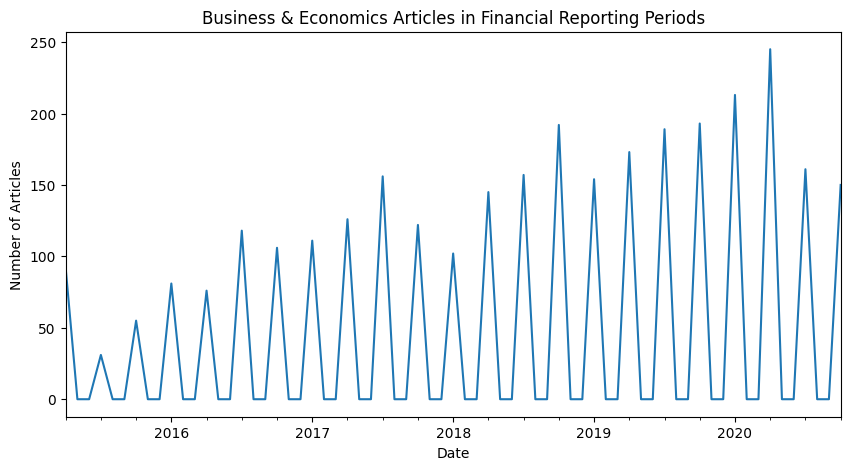

In [53]:
business_data = data[data['Category'] == 'Business & Economics']
quarters = business_data[business_data.index.month.isin([1, 4, 7, 10])]

plt.figure(figsize=(10, 5))
quarters.resample('M').size().plot()
plt.title('Business & Economics Articles in Financial Reporting Periods')
plt.ylabel('Number of Articles')
plt.show()


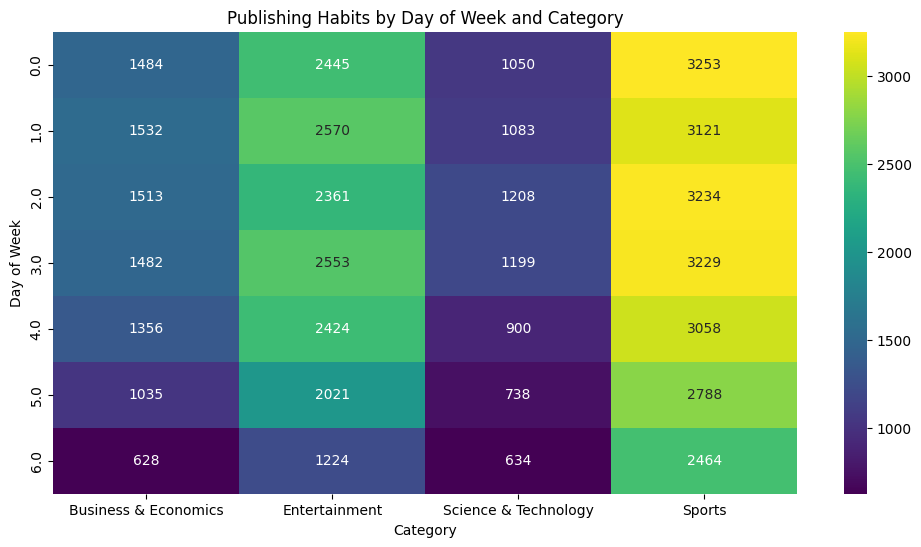

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
data['Day of Week'] = data.index.dayofweek
weekday_publish_pattern = data.groupby([data['Day of Week'], 'Category']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(weekday_publish_pattern, cmap='viridis', annot=True, fmt='d')
plt.title('Publishing Habits by Day of Week and Category')
plt.xlabel('Category')
plt.ylabel('Day of Week')
plt.show()


Question : which article are more prevalent  weekdays and weekends.
# Insight

**Q.** What is the distribution of news articles across different categories in the dataset?
- **A.** the news article are divided into 4 categories which are sports, entertainemnt, Business & Economics and Science and Technology
The highest one is sports and then enterntainment come to place followed by business and economics and last is Science and Technology.

**Q.** Which news sources contribute the most articles in the dataset?
- **A** There are 5 number of sources contributed in dataset and most of the news are from GEO NEWS and the least are from Express news and in between the three categories the the most contriobution is DAWN NEWS , AB TAK NEWS and 92 News.

**Q.**What is the trend of news publication over time?
- **A** The data set contains the news from 21012 till 2021 and the news trend watch it highest in 2017 and lowest in 2014

**Q.** What is the average length of news articles for each category?
- **A** Despite that the dataset contain the most news of news but the highest average lenght of news category is from SCIENCE & TECHNOLOGY (1600 Character) and the lowest is from BUSINESS AND ECONOMICS (1100 character)

**Q.** How has the publication of news articles in each category changed over time?
- **A** The most of fluctuation in the trends seems in sports news and the least changes in Science and Technologies

**Q.** What is the correlation between specific headline types (common words in headlines) and the length of news articles?
- **A** if we consider 1 is the news lenght then کیا is most repeated word in longest length and the lowest is کے and the most repeated word shortest article is میں and the least repeated word is جاری in news of all over category.

**Q.** How is the distribution of news categories across weekdays and weekends?
- **A** We have most news of sports in data but if we take the average than on Mondays the most news are from Entertainment and the least of Entertainment are on Sunday and it seems that the least news are from all 4 categories are on Sunday.

**Q.**What are the seasonal trends in the distribution of news categories throughout the year?
- **A** The highest number of news in May of Business & Economics , the highest no of news of entertainment is in October, The highest no of news in Science And Technology is in April and May, and the highest news in Sports category is in March.